# Project: Logging and Monitoring System with Boto3, AWS Lambda, SNS, & Dynamodb 
> by Steve Nalos, February 2022

## Background 
### <font color=DarkGreen> Problem Statement</font>

Your company recently acquired another company (company B). 
You are part of the DevOps team.

Your task is to <b> integrate all the existing systems of company B to your company's systems. </b>
One of the first things that your team needs to do is to understand the behavior of company B's systems and to do that, you need to collect data. Also, your data collection strategy needs to be generic enough so that it can accomodate different types of systems (web apps, mobile apps, etc.).


## Proposed Solution
Your team's proposed solution is a <b> logging and monitoring system </b> which will create a record of log events generated from applications from different systems that serves as a detailed record of occurrences within different systems. It will also send a real-time alert to the DevOps team for things that need immediate attention.

Logging and monitoring will help improve observability and can reduce the time spent sifting through log files when determining the root cause of problems.


## Architecture
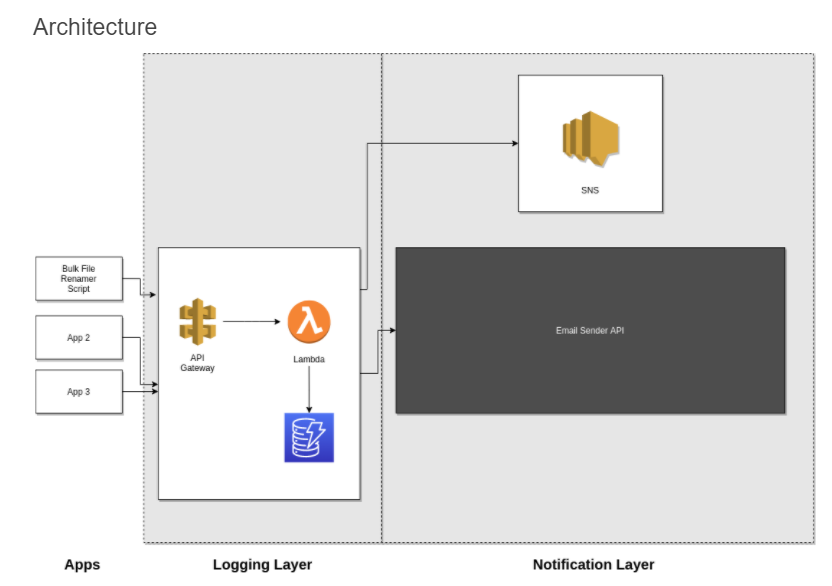

## AWS Resources and Services 
### <font color=DarkGreen>AWS Lambda Function </font>
AWS Lambda function was used to run the codes for logging and notification system. It's purposes are: 
(1) Store the logs as items in a Dynamodb table; 
(2) Check for critical logs and sends a real-time alert to the DevOps team; and 
(3) Route log message to appropriate SNS topics for each log level. 
### <font color=DarkGreen>AWS API Gateway</font> 
AWS API Gateway was used alongside with AWS Lambda Function to make the function available for POST method requests through its endpoint. 
### <font color=DarkGreen>AWS Simple Notification Service (SNS)</font> 
Basically, the AWS SNS was used to send notifications, through the configured method of email, to subscribed entities. Five SNS Topics were created corresponding to log levels which were: 
1. Critical - Designates very severe error events that will presumably                 lead the application to abort.   
2. Error - Designates error events that might still allow the application            to continue running. 
3. Warning - Designates potentially harmful situations
4. Info - Designates informational messages that highlight the progress             of the application at coarse-grained level. 
5. Debug - Informational events that are most useful to debug an app.

### <font color=DarkGreen> AWS DynamoDB </font>
AWS DynamoDB is a NoSQL database which were used to store logs as items in the DynamoDB table. 'source_application' was used as primary key, and 'period' as composite primary key. 
### <font color=DarkGreen> AWS Identity and Access Management (IAM) </font>
AWS IAM was used to provision an aws account with necessary permissions and roles assigned to it to enable access to aws resources and other functionalities. 

# Files
The project includes these files:
1. `service.py` - used to deploy the codes that the lambda function will contain. 
2. `deploy_function.py` - used alongside with `requirements.txt` and `service.py` to deploy codes within `service.py` and install necessary packages specified in the `requirements.txt` to AWS Lambda through CLI. 
3. `email_consumer.py` - provides sample mechanism for sending messages.
4. `service_consumer.py` - use for the testing of AWS lambda function. 
5. `event_logger.py` - contains the function called to invoke AWS Lambda function. 
6. `csv_parser.py` - Parse csv file contents from the internet, and output to a csv file.
7. `bulk_renamer_files.py` - Rename files with a specified regex pattern. 
8. `README.md` - provides introduction and information of this project.
9. `requirements.txt` - list all python packages for the lambda function to work. 
10. `setup.py` - contains metadata of the project. 
11. `LICENSE` - delimits the usage of the files. 
12. `tests folder` - screenshots required for submission. 

# Project Steps 
## Part 1: Create an API with the following specifications:
1. Utilizes API Gateway (REST) and AWS Lambda
    -Python Lambda (https://docs.aws.amazon.com/lambda/latest/dg/python-handler.html)
2. Accepts the following parameters:
    - log_level (string-log severity)        
        - critical
        - error
        - warning
        - info
        - debug
    - message (string - actual log message)
    - details (string - any additional value you want to log)
    - source_application (string - script's filename)
3. Create SNS topics for each log_level.
4. The lambda function should be able to route messages to appropriate SNS topics for each log level. 
5. For messages with critical log level, send an email to the devops team by
calling the <b> Email Sender API (POST) </b>
    - url: <available for request>
    - params:
        - to (string - email to send alert to - use whitelisted emails)
        - subject (string - email subject)
        - body (string - alert message)
        - example call using requests:
            -requests.post(url, json={‘to’: ‘you@email.com’, ‘subject’:  ‘[CRITICAL ERROR]’, body: ‘An error has occurred in the application.’})
6. Deploying python packages to AWS Lambda:
https://docs.aws.amazon.com/lambda/latest/dg/python-package-update.html

## Part 2: Update Products CSV Reader and Writer script to send logs the Logging and Notification API
Update your Products CSV Reader and Writer script from Day 1 to utilize the Logging and Notification API
1. The script should be able to call your Logging and Notification API for each logging level and send corresponding messages. Sample Payload:

    {
      "log_level": "INFO",
      "message": "Done processing <filename.csv>",
      "details": ""
      "source_application": "products-csv-rw"
    }
    
## Other Features
1. Bulk Renamer script embedded with logging and notification features. 
2. Log Messages to a Database

    a. Create a DynamoDB table named application_logs with the following columns:
    - log_level (string)
    - message (string)
    - details (string)
    - source_application (string)
    
   b. Update your Logging and Notification Lambda function to log messages to a DynamoDB table


# References
- Logging Levels - https://www.tutorialspoint.com/log4j/log4j_logging_levels.htm
- Boto3 API - https://go.aws/2vDSeFQ
- Boto3 DynamoDB Customization - https://go.aws/2vDSeFQ
- Deploying Python Package in Lambda - https://go.aws/2vDSeFQ
- Using Lambda with API Gateway - https://go.aws/2vDSeFQ